# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the CSV file

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
value_counts_series = df['species'].value_counts()
value_counts_series

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data Preprocessing : No Null values detected

In [7]:
null_counts = df.isnull().sum()
null_counts

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Performing Exploratory Data Analysis (EDA)

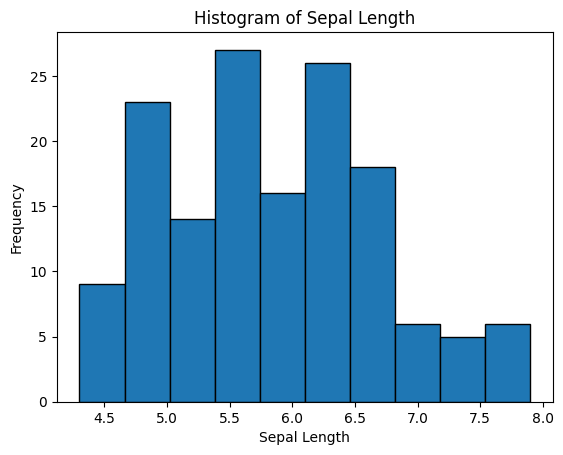

In [8]:
plt.hist(df['sepal_length'], bins=10, edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

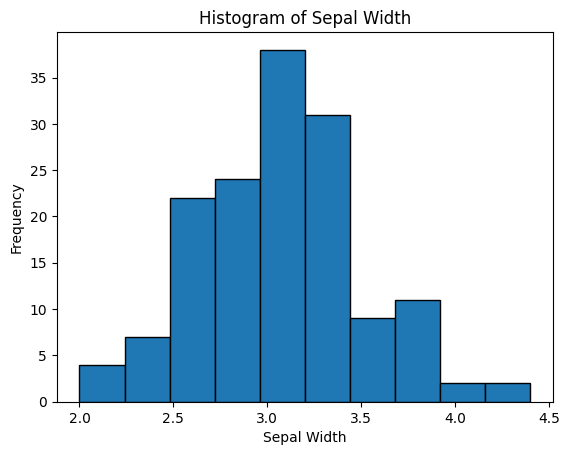

In [9]:
plt.hist(df['sepal_width'], bins=10, edgecolor='black')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')
plt.show()

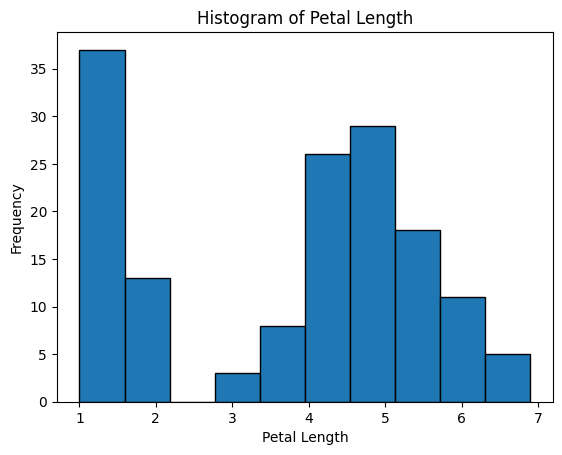

In [10]:
plt.hist(df['petal_length'], bins=10, edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()

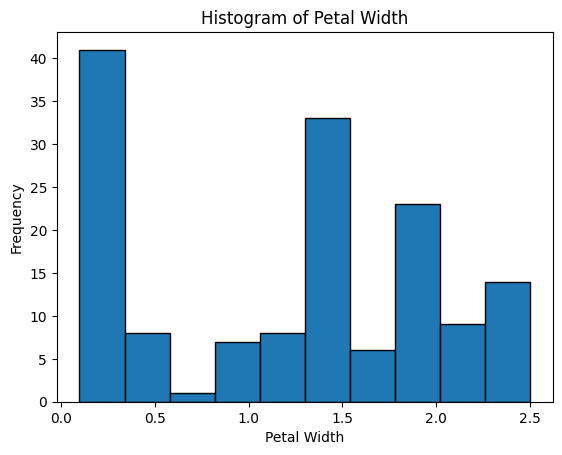

In [11]:
plt.hist(df['petal_width'], bins=10, edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

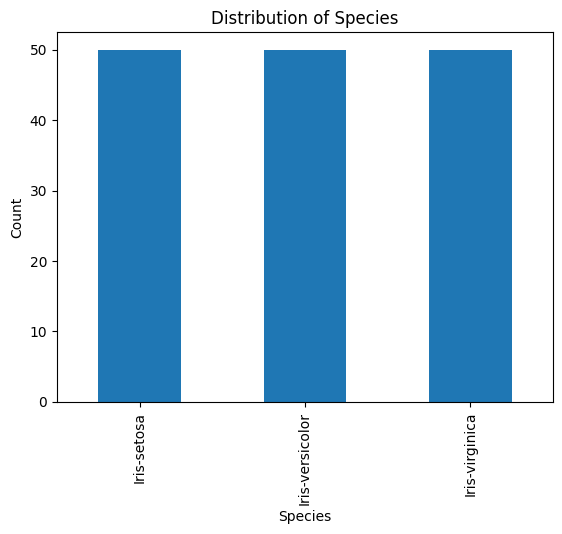

In [12]:
species_counts = df['species'].value_counts()
species_counts.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Distribution of Species')
plt.show()

In [13]:
# Defining colors for each species
colors = ['blue' , 'orange' , 'red']
species = ['Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica']

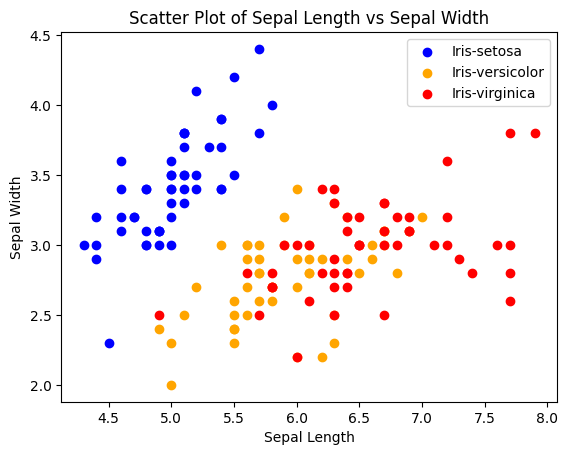

In [14]:
for i in range(3):
    species_data = df[df['species'] == species[i]]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label = species[i], color = colors[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend()      
plt.show()

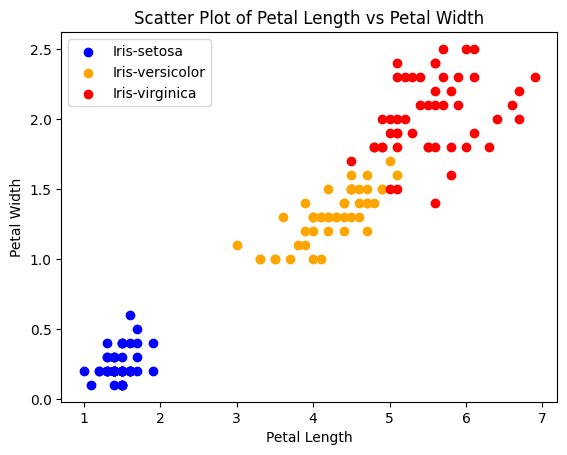

In [15]:
for i in range(3):
    species_data = df[df['species'] == species[i]]
    plt.scatter(species_data['petal_length'], species_data['petal_width'], label = species[i], color = colors[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.legend()      
plt.show()

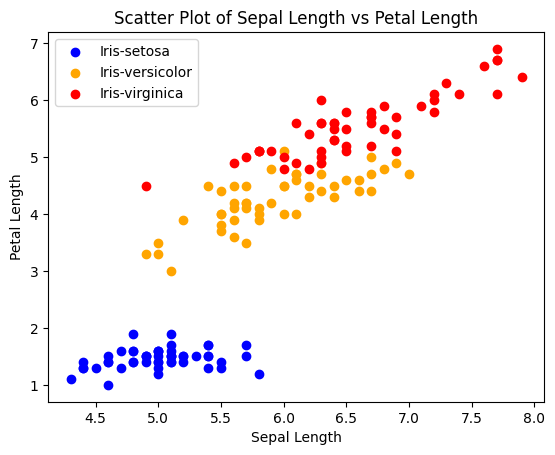

In [16]:
for i in range(3):
    species_data = df[df['species'] == species[i]]
    plt.scatter(species_data['sepal_length'], species_data['petal_length'], label = species[i], color = colors[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.legend()      
plt.show()

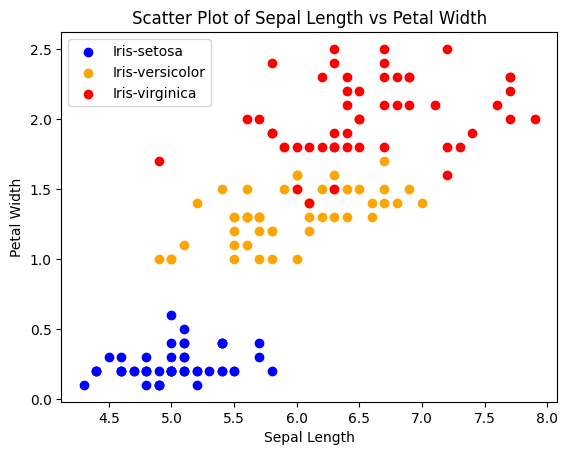

In [17]:
for i in range(3):
    species_data = df[df['species'] == species[i]]
    plt.scatter(species_data['sepal_length'], species_data['petal_width'], label = species[i], color = colors[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Sepal Length vs Petal Width')
plt.legend()      
plt.show()

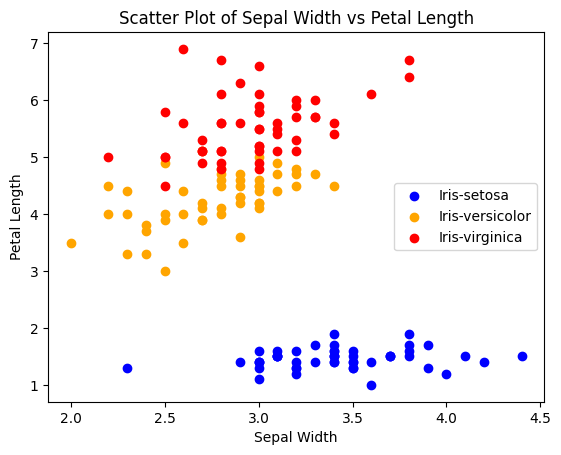

In [18]:
for i in range(3):
    species_data = df[df['species'] == species[i]]
    plt.scatter(species_data['sepal_width'], species_data['petal_length'], label = species[i], color = colors[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal Width vs Petal Length')
plt.legend()      
plt.show()

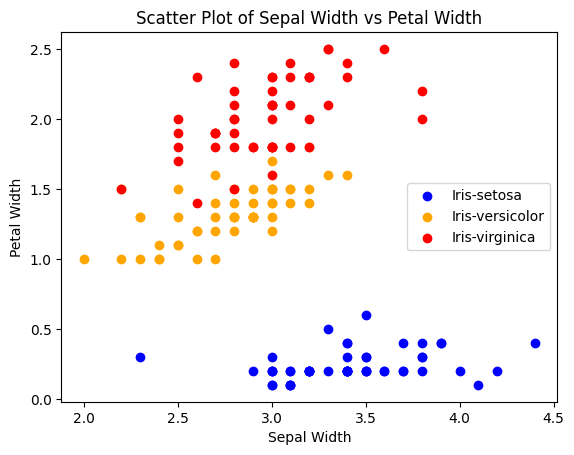

In [19]:
for i in range(3):
    species_data = df[df['species'] == species[i]]
    plt.scatter(species_data['sepal_width'], species_data['petal_width'], label = species[i], color = colors[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Sepal Width vs Petal Width')
plt.legend()      
plt.show()

# Finding Correlation Matrix

In [20]:
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


# Model Training and Testing

In [21]:
# splitting dataset for training and testing
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['species'])
Y = df['species']                
x_train, x_test, y_train, y_test = train_test_split(X , Y , test_size = 0.30, random_state = 0)        

In [22]:
from sklearn.neighbors import KNeighborsClassifier 

In [23]:
model = KNeighborsClassifier()

In [24]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
# Defining new data points
x_new = np.array([[6.7, 2.3, 5.7, 1.1], [5, 2.9, 1, 0.2], [6.5, 3.1, 4.1, 1.9]])

# Defining feature names
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Creating a DataFrame with the data and feature names
x_new_df = pd.DataFrame(x_new, columns=feature_names)

# Making a prediction using the trained model
predicted_species = model.predict(x_new_df)
print("Prediction results:", predicted_species)

Prediction results: ['Iris-virginica' 'Iris-setosa' 'Iris-versicolor']
